<a href="https://colab.research.google.com/github/pratikagithub/Regression-Projects/blob/main/Compare_Multiple_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The comparison of multiple Machine Learning models refers to training, evaluating, and analyzing the performance of different algorithms on the same dataset to identify which model performs best for a specific predictive task.

**Compare Multiple Machine Learning Models: Process We Can Follow**

By comparing multiple models, we aim to select the most effective algorithm that offers the optimal balance of accuracy, complexity, and performance for their specific problem. Below is the process we can follow for the task of comparing multiple Machine Learning models:

Address missing values, remove duplicates, and correct errors in the dataset to ensure the quality of data fed into the models.

Divide the dataset into training and testing sets, typically using a 70-30% or 80-20% split.

Select a diverse set of models for comparison. It can include simple linear models, tree-based models, ensemble methods, and more advanced algorithms, depending on the problem’s complexity and data characteristics.

Fit each selected model to the training data. It involves adjusting the model to learn from the features and the target variable in the training set.

Use a set of metrics to evaluate each model’s performance on the test set.
Compare the models based on the evaluation metrics, considering both their performance and computational efficiency.

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('Real_Estate.csv')

# display the first few rows
data_head = data.head()

print(data_head)

Saving Real_Estate.csv to Real_Estate.csv
             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144   
2  2012-09-05 01:10:52.349449        1.1                            1978.6710   
3  2012-09-05 13:26:01.189083       22.2                            1055.0670   
4  2012-09-06 08:29:47.910523        8.5                             967.4000   

   Number of convenience stores   Latitude   Longitude  \
0                             8  25.007059  121.561694   
1                             2  25.012148  121.546990   
2                            10  25.003850  121.528336   
3                             5  24.962887  121.482178   
4                             6  25.011037  121.479946   

   House price of unit area  
0                  6.488673  
1                 24.970725  
2                 26.694267  
3 

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
None


The dataset consists of 414 entries and 7 columns, with no missing values. Here’s a brief overview of the columns:

Transaction date: The date of the house sale (object type, which suggests it might need conversion or extraction of useful features like year, month, etc.).

House age: The age of the house in years (float).

Distance to the nearest MRT station: The distance to the nearest mass rapid transit station in meters (float).

Number of convenience stores: The number of convenience stores in the living circle on foot (integer).

Latitude: The geographic coordinate that specifies the north-south position (float).

Longitude: The geographic coordinate that specifies the east-west position (float).

House price of unit area: Price of the house per unit area (float), which is likely our target variable for prediction.

So, we are solving a regression problem here. In the next steps, we will preprocess the data and select regression models to find the best-performing model for our problem.

**Data Preprocessing**

Let’s start with the preprocessing steps. Below are the steps we will follow to preprocess our data:

Since the transaction date is in a string format, we will convert it into a datetime object. We can then extract features such as the transaction year and month, which might be useful for the model.

We’ll scale the continuous features to ensure they’re on a similar scale. It is particularly important for models like Support Vector Machines or K-nearest neighbours, which are sensitive to the scale of input features.

We’ll split the dataset into a training set and a testing set. A common practice is to use 80% of the data for training and 20% for testing.
Let’s implement these preprocessing steps:

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime

# convert "Transaction date" to datetime and extract year and month
data['Transaction date'] = pd.to_datetime(data['Transaction date'])
data['Transaction year'] = data['Transaction date'].dt.year
data['Transaction month'] = data['Transaction date'].dt.month

# drop the original "Transaction date" as we've extracted relevant features
data = data.drop(columns=['Transaction date'])

# define features and target variable
X = data.drop('House price of unit area', axis=1)
y = data['House price of unit area']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape

(331, 7)

In [4]:
X_test_scaled.shape

(83, 7)

Model Training and Comparison
Now, we’ll proceed with training multiple models and comparing their performance. We’ll start with a few commonly used models for regression tasks:

Linear Regression: A good baseline model for regression tasks.

Decision Tree Regressor: To see how a simple tree-based model performs.

Random Forest Regressor: An ensemble method to improve upon the decision tree’s performance.

Gradient Boosting Regressor: Another powerful ensemble method for regression.

We’ll train each model using the training data and evaluate their performance on the test set using Mean Absolute Error (MAE) and R-squared (R²) as metrics. These metrics will help us understand both the average error of the predictions and how well the model explains the variance in the target variable.

Let’s start with training these models and comparing their performance:

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# dictionary to hold the evaluation metrics for each model
results = {}

# train and evaluate each model
for name, model in models.items():
    # training the model
    model.fit(X_train_scaled, y_train)

    # making predictions on the test set
    predictions = model.predict(X_test_scaled)

    # calculating evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # storing the metrics
    results[name] = {"MAE": mae, "R²": r2}

results_df = pd.DataFrame(results).T  # convert the results to a DataFrame for better readability
print(results_df)

                         MAE        R²
Linear Regression   9.748246  0.529615
Decision Tree      11.760342  0.204962
Random Forest       9.887601  0.509547
Gradient Boosting  10.000117  0.476071


The performance of each model on the test set, measured by Mean Absolute Error (MAE) and R-squared (R²), is as follows:
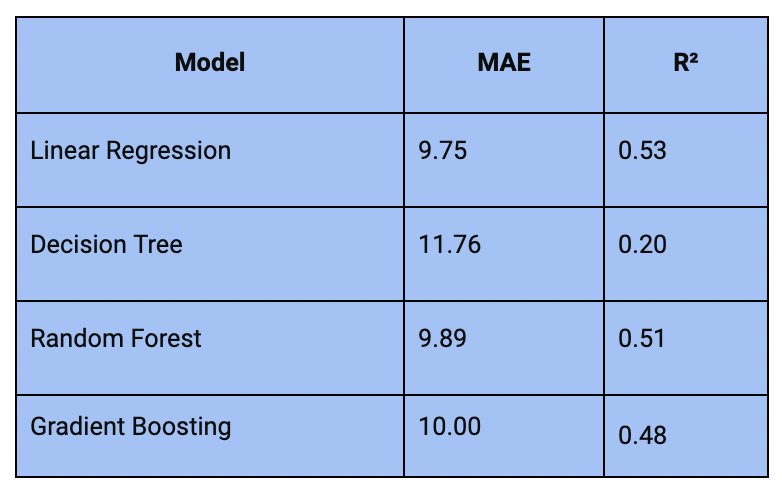

Linear Regression has the lowest MAE (9.75) and the highest R² (0.53), making it the best-performing model among those evaluated. It suggests that, despite its simplicity, Linear Regression is quite effective for this dataset.


Decision Tree Regressor shows the highest MAE (11.76) and the lowest R² (0.20), indicating it may be overfitting to the training data and performing poorly on the test data. On the other hand, Random Forest Regressor and Gradient Boosting Regressor have similar MAEs (9.89 and 10.00, respectively) and R² scores (0.51 and 0.48, respectively), performing slightly worse than the Linear Regression model but better than the Decision Tree.